In [1]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

-- label_flip --
1_moment avg: 0.9402
1_moment cwtm: 0.9591
1_moment meamed: 0.9504
1_moment cwm: 0.8569
2_moments avg: 0.9258
2_moments cwtm: 0.9503
2_moments meamed: 0.9462
2_moments cwm: 0.9381
2_2_moments avg: 0.9541
2_2_moments cwtm: 0.9479
2_2_moments meamed: 0.9301
2_2_moments cwm: 0.9471
-- sign_flip --
1_moment avg: 0.8275
1_moment cwtm: 0.9754
1_moment meamed: 0.9676
1_moment cwm: 0.9427
2_moments avg: 0.9204
2_moments cwtm: 0.9422
2_moments meamed: 0.9419
2_moments cwm: 0.7622
2_2_moments avg: 0.9355
2_2_moments cwtm: 0.9466
2_2_moments meamed: 0.9216
2_2_moments cwm: 0.9228
-- little --
1_moment avg: 0.2656
1_moment cwtm: 0.8559
1_moment meamed: 0.6757
1_moment cwm: 0.4847
2_moments avg: 0.5632
2_moments cwtm: 0.8549
2_moments meamed: 0.8563
2_moments cwm: 0.7217
2_2_moments avg: 0.6758
2_2_moments cwtm: 0.852
2_2_moments meamed: 0.7475
2_2_moments cwm: 0.8172


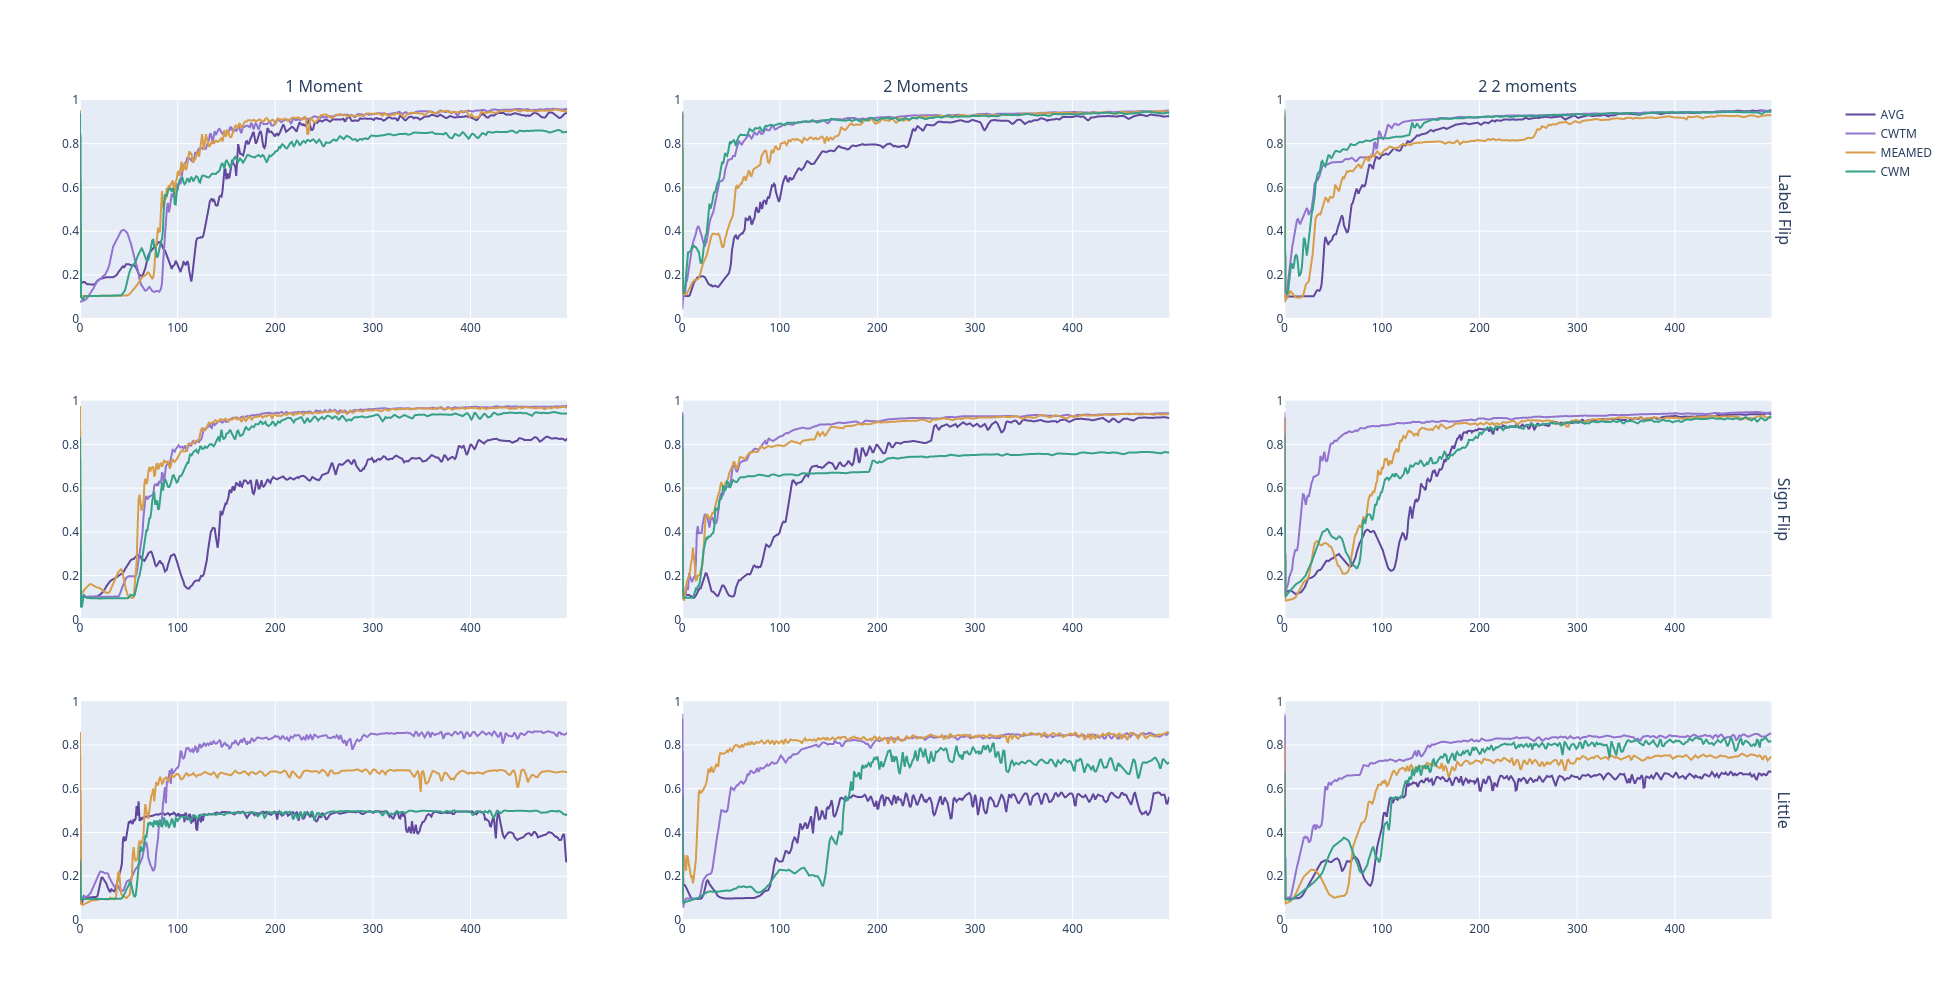

In [33]:
fig = make_subplots(rows=3, cols=3, column_titles = ["1 Moment", "2 Moments", "2 2 moments"],  row_titles=['Label Flip', "Sign Flip", "Little"])
attack = "label_flip" # little, label_flip

x = np.arange(500)

for idx_att, attack in enumerate(["label_flip", "sign_flip", "little"]):
    
    print(f"-- {attack} --")
    for idx, moments in enumerate(["1_moment", "2_moments", "2_2_moments"]):
        
        results_avg = np.load(f"results/test_accuracy/{moments}/{attack}/avg_15_5_500.npy", allow_pickle=True) 
        results_cwtm = np.load(f"results/test_accuracy/{moments}/{attack}/cwtm_15_5_500.npy", allow_pickle=True) 
        results_meamed = np.load(f"results/test_accuracy/{moments}/{attack}/meamed_15_5_500.npy", allow_pickle=True) 
        results_cwm = np.load(f"results/test_accuracy/{moments}/{attack}/cwm_15_5_500.npy", allow_pickle=True) 

        print(f"{moments} avg: {results_avg[0][-1]}")
        print(f"{moments} cwtm: {results_cwtm[0][-1]}")
        print(f"{moments} meamed: {results_meamed[0][-1]}")
        print(f"{moments} cwm: {results_cwm[0][-1]}")


        fig.add_trace(
            go.Scatter(
                name = "AVG",
                x = x,
                y = results_avg[0],
                mode = 'lines',
                legendgroup = "g1",
                showlegend= True if idx_att==1 and idx==1 else False,
                line_color='#62489d'
            ), row=idx_att+1, col=idx+1
        )

        fig.add_trace(
            go.Scatter(
                name = "CWTM",
                x = x,
                y = results_cwtm[0],
                mode = 'lines',
                legendgroup = "g1",
                showlegend= True if idx_att==1 and idx==1 else False,
                line_color='#9274cf'
            ), row=idx_att+1, col=idx+1
        )

        fig.add_trace(
            go.Scatter(
                name = "MEAMED",
                x = x,
                y = results_meamed[0],
                mode = 'lines',
                legendgroup = "g1",
                showlegend= True if idx_att==1 and idx==1 else False,
                line_color='#d79d4b'
            ), row=idx_att+1, col=idx+1
        )

        fig.add_trace(
            go.Scatter(
                name = "CWM",
                x = x,
                y = results_cwm[0],
                mode = 'lines',
                legendgroup = "g1",
                showlegend= True if idx_att==1 and idx==1 else False,
                line_color='#37a187'
            ), row=idx_att+1, col=idx+1
        )

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000)

fig.update_yaxes(range=[0,1])

fig.show()

In [15]:
x = np.arange(1000)

# avg
mean_avg = np.mean(results_avg, 0)
std_avg = np.std(results_avg, 0)

mean_with_std_avg = mean_avg+std_avg
mean_no_std_avg = mean_avg-std_avg

# cwtm
mean_cwtm = np.mean(results_cwtm, 0)
std_cwtm = np.std(results_cwtm, 0)

mean_with_std_cwtm = mean_cwtm+std_cwtm
mean_no_std_cwtm = mean_cwtm-std_cwtm

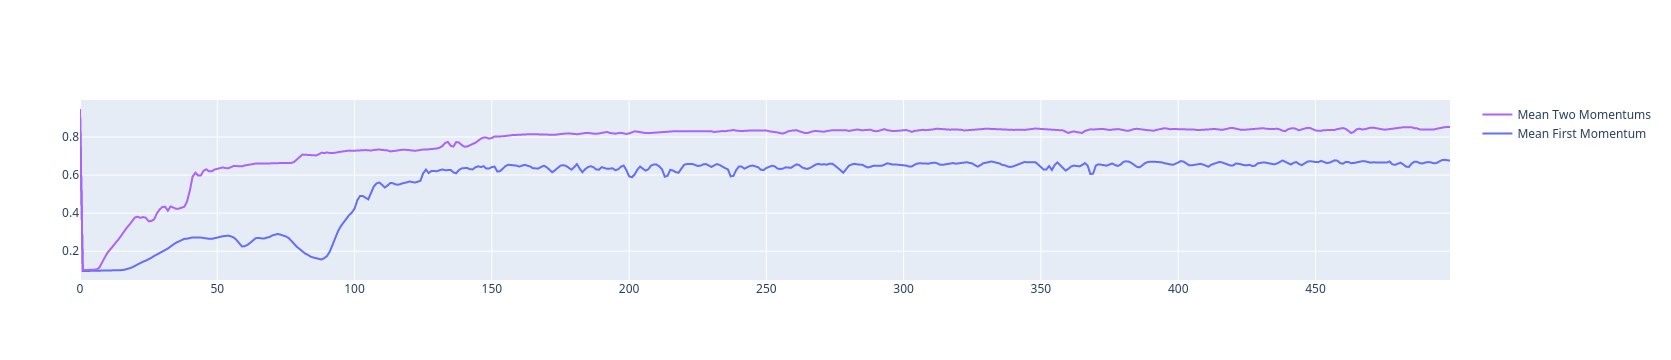

In [16]:
fig = go.Figure([
    go.Scatter(
        name = "Mean First Momentum",
        x = x,
        y = mean_avg,
        mode = 'lines'
    ),
    go.Scatter(
        name = "Std lower",
        x = x, 
        y = mean_no_std_avg,
        mode = 'lines',
        marker = dict(color='#444'),
        showlegend=False,
        line=dict(width=0),
    ),
    go.Scatter(
        name = "Std upper",
        x = x, 
        y = mean_with_std_avg,
        mode = 'lines',
        marker = dict(color='#444'),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False,
        line=dict(width=0),
    ),
    go.Scatter(
        name = "Mean Two Momentums",
        x = x,
        y = mean_cwtm,
        mode = 'lines'
    ),
    go.Scatter(
        name = "Std lower",
        x = x, 
        y = mean_no_std_cwtm,
        mode = 'lines',
        marker = dict(color='#444'),
        showlegend=False,
        line=dict(width=0),
    ),
    go.Scatter(
        name = "Std upper",
        x = x, 
        y = mean_with_std_cwtm,
        mode = 'lines',
        marker = dict(color='#444'),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False,
        line=dict(width=0),
    ),
])
#fig.update_yaxes(rangemode='tozero')
fig.show()